In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt', header=None, sep = " ")

In [3]:
df.rename(columns = {0: 'date', 1:'time', 2: 'page', 3: 'x', 4:'y', 5:'ip_address'},inplace = True)

In [4]:
df['datetime'] = df[['date', 'time']].apply(lambda x: ' '.join(x), axis =1)
df.datetime= pd.to_datetime(df.datetime)
              
              
              
              
              
              
              

In [5]:
df.set_index('datetime', inplace = True)
df.drop(columns = ['date', 'time'], inplace = True)
df.head()

,page,x,y,ip_address
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [68]:
us = df['2019-09']

me = us[us.y == 34]
me

,page,x,y,ip_address
datetime,,,,
2019-09-01 10:36:21,4-python/project,473,34.0,67.10.174.4
2019-09-01 10:51:34,5-stats/5-power-analysis,473,34.0,67.10.174.4
2019-09-01 10:53:14,appendix/interview_questions_students,473,34.0,67.10.174.4
2019-09-01 11:32:43,appendix/cli/6-moving-files,358,34.0,65.43.118.72
2019-09-01 11:32:48,appendix/cli/5-creating-files-and-directories,358,34.0,65.43.118.72
2019-09-01 11:33:55,appendix/cli/0-overview,358,34.0,65.43.118.72
2019-09-01 16:15:27,/,476,34.0,136.50.49.145
2019-09-01 16:15:44,3-sql/1-mysql-overview,476,34.0,136.50.49.145
2019-09-01 16:16:01,3-sql/3-databases,476,34.0,136.50.49.145


In [71]:
US = df[df.y == 34]
# 97.105.19.58
# 97.105.19.61

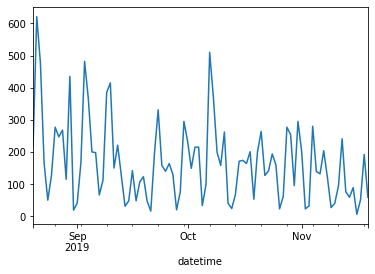

In [86]:
Outside = US[(US.ip_address != '97.105.19.58') & (US.ip_address !='97.105.19.61')]
US.resample('D').count().page.plot()

In [108]:
twotwo = df[df.y==22]
twothree = df[df.y==23]
twofour = df[df.y==24]
twofive = df[df.y==25]
twosix = df[df.y==26]
twoseven = df[df.y==27]
twoeight = df[df.y==28]
twonine = df[df.y==29]
threezero = df[df.y==30]
threeone = df[df.y==31]
threetwo = df[df.y==32]
threethree = df[df.y==33]
threefour = df[df.y==34]
fiveone = df[df.y==51]
fivetwo = df[df.y==52]

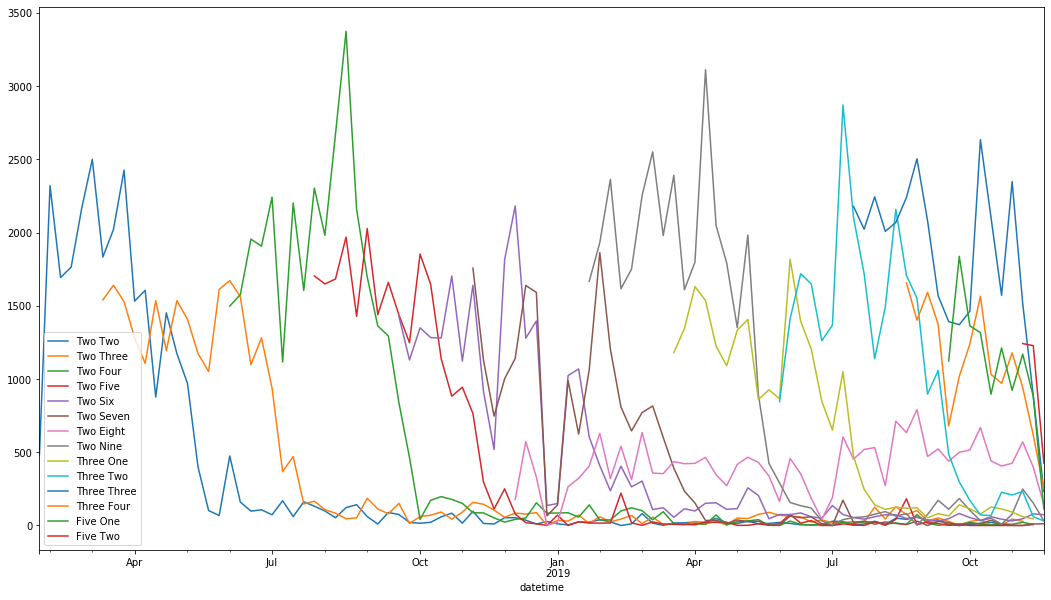

In [121]:
figsize = (18,10)

twotwo.resample('W').count().page.plot(figsize = (18,10), label = "Two Two")
twothree.resample('W').count().page.plot(label = 'Two Three')
twofour.resample('W').count().page.plot(label = 'Two Four')
twofive.resample('W').count().page.plot(label = 'Two Five')
twosix.resample('W').count().page.plot(label = 'Two Six')
twoseven.resample('W').count().page.plot(label = 'Two Seven')
twoeight.resample('W').count().page.plot(label = 'Two Eight')
twonine.resample('W').count().page.plot(label = 'Two Nine')
# threezero.resample('W').count().page.plot()
threeone.resample('W').count().page.plot(label = 'Three One')
threetwo.resample('W').count().page.plot(label = 'Three Two')
threethree.resample('W').count().page.plot(label = 'Three Three')
threefour.resample('W').count().page.plot(label = 'Three Four')
fiveone.resample('W').count().page.plot(label = 'Five One')
fivetwo.resample('W').count().page.plot(label = 'Five Two')
plt.legend()

In [132]:
twofive.x.

datetime
2018-07-29    1704
2018-08-05    1649
2018-08-12    1683
2018-08-19    1969
2018-08-26    1428
2018-09-02    2028
2018-09-09    1440
2018-09-16    1660
2018-09-23    1438
2018-09-30    1248
2018-10-07    1853
2018-10-14    1647
2018-10-21    1138
2018-10-28     883
2018-11-04     944
2018-11-11     765
2018-11-18     297
2018-11-25     113
2018-12-02     250
2018-12-09      78
2018-12-16      19
2018-12-23      12
2018-12-30       0
2019-01-06      71
2019-01-13       0
2019-01-20      25
2019-01-27      17
2019-02-03      16
2019-02-10      17
2019-02-17     221
              ... 
2019-04-28      22
2019-05-05       1
2019-05-12       1
2019-05-19      12
2019-05-26       1
2019-06-02      13
2019-06-09      76
2019-06-16      16
2019-06-23      33
2019-06-30       0
2019-07-07       0
2019-07-14      11
2019-07-21       4
2019-07-28       0
2019-08-04      26
2019-08-11       1
2019-08-18      42
2019-08-25     182
2019-09-01       5
2019-09-08      25
2019-09-15      13
201